In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegression:
    def __init__(self, n_features):
        self.weights = np.random.randn(n_features, 1)
        self.bias = 0.
    
    def forward(self, x):
        return x @ self.weights + self.bias
    
    def backward(self, x, y, y_hat):
        dw = (1 / len(x)) * (x.T @ (y_hat - y))
        db = (1 / len(x)) * np.sum(y_hat - y)
        return dw, db
    
    def optimize(self, dw, db, lr=0.001):
        self.weights -= lr * dw
        self.bias -= lr * db

    def train(self, x, y):
        y_hat = self.forward(x)
        dw, db = self.backward(x, y, y_hat)
        self.optimize(dw, db)

In [3]:
X, Y = make_regression(n_features=1, noise=20, random_state=42)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

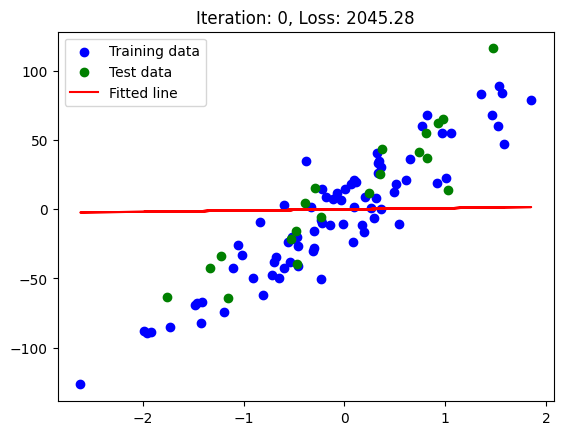

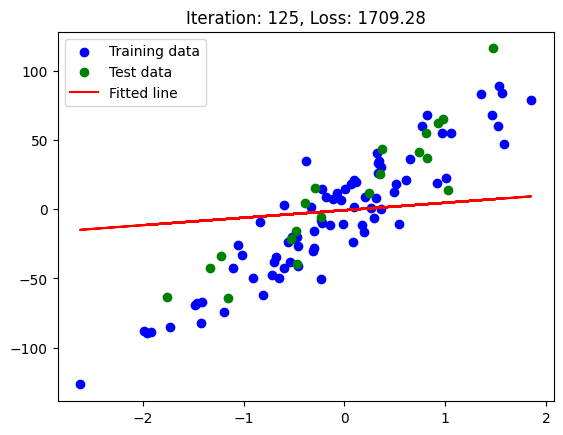

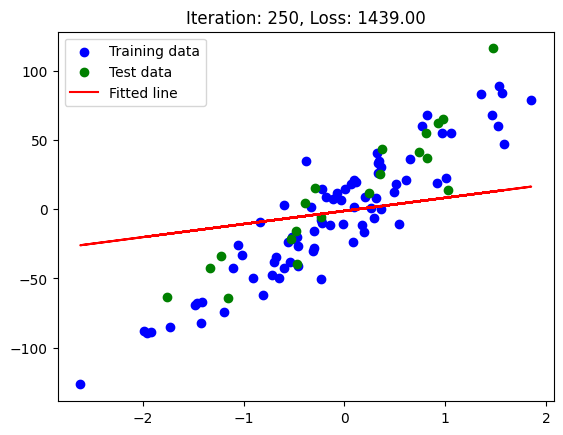

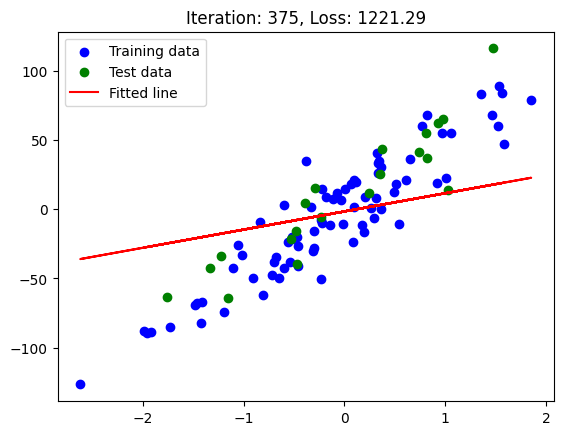

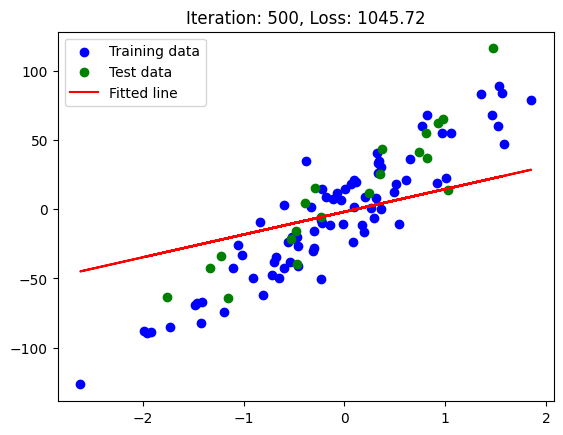

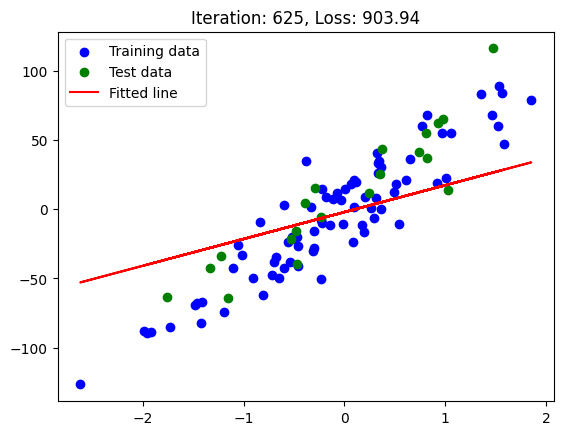

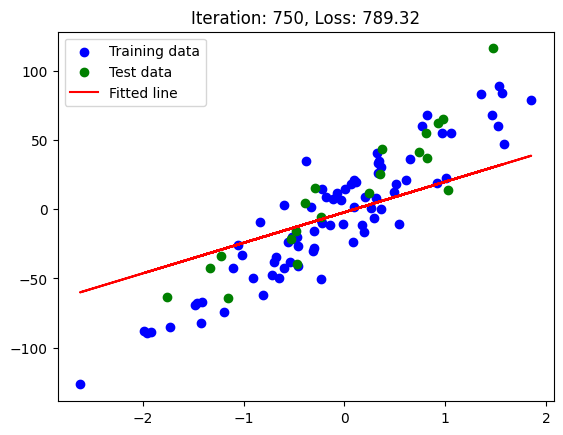

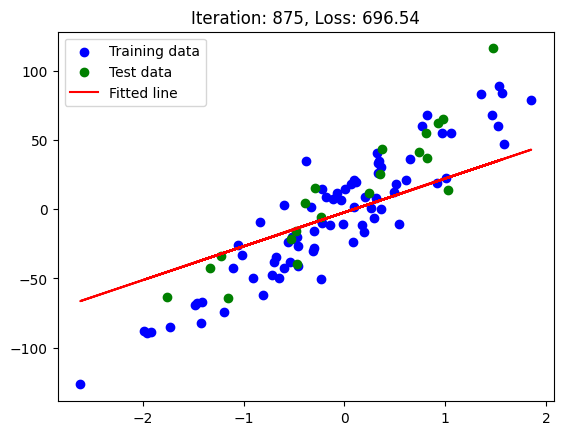

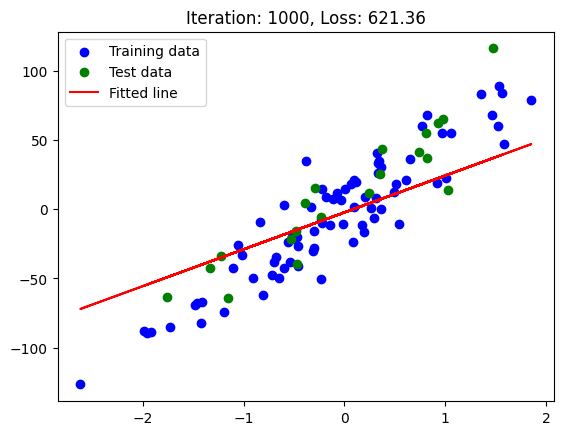

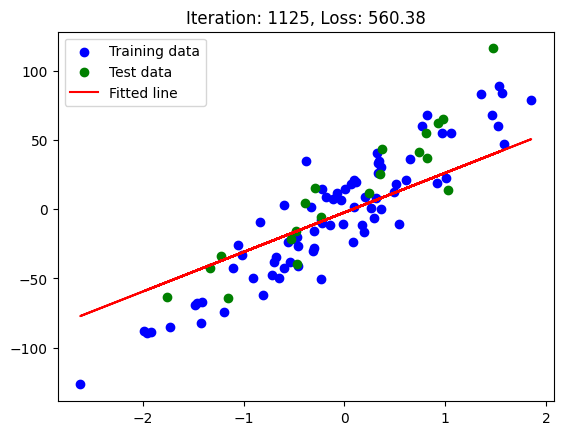

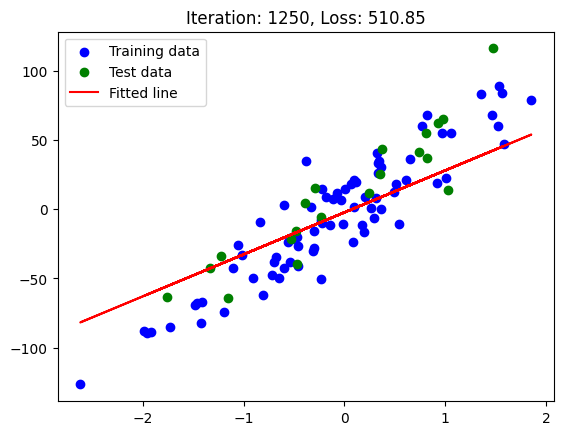

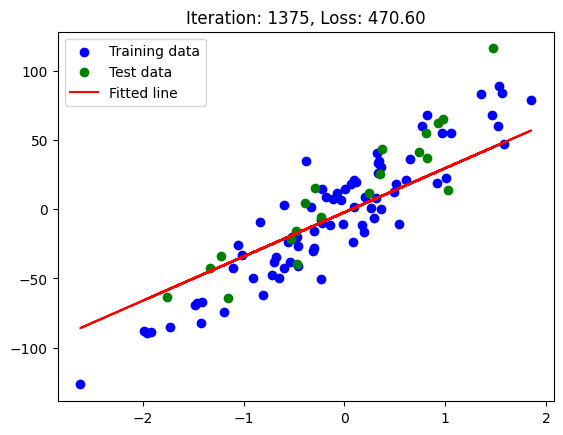

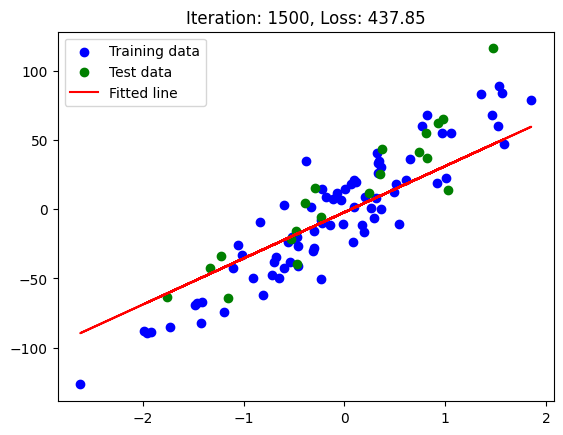

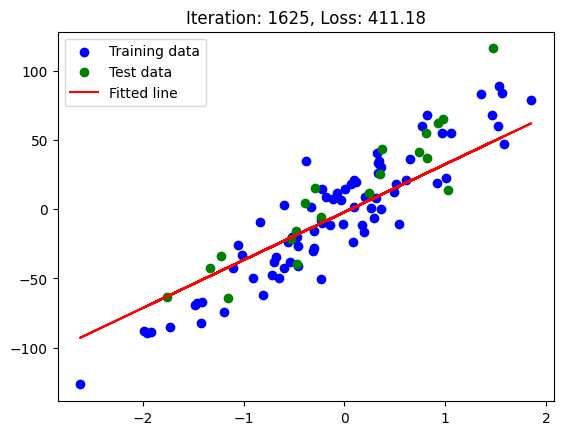

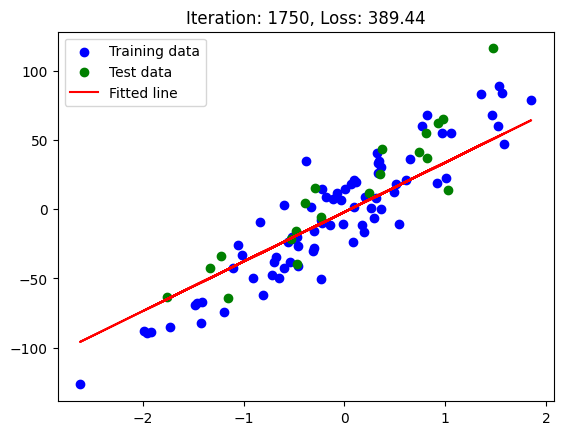

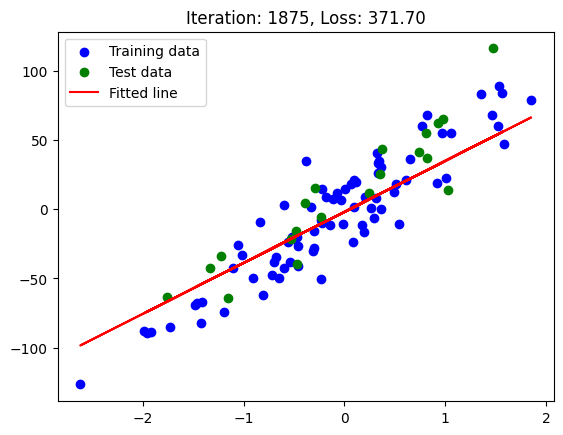

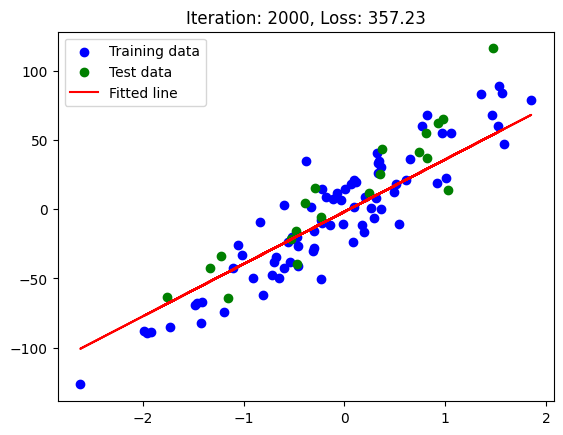

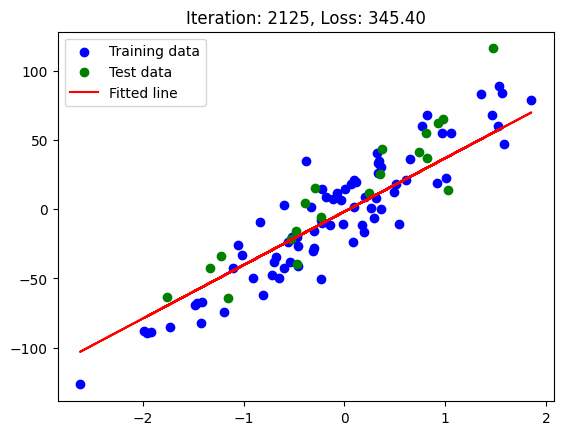

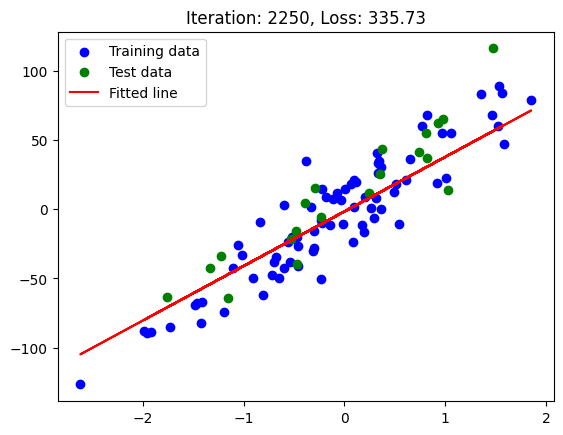

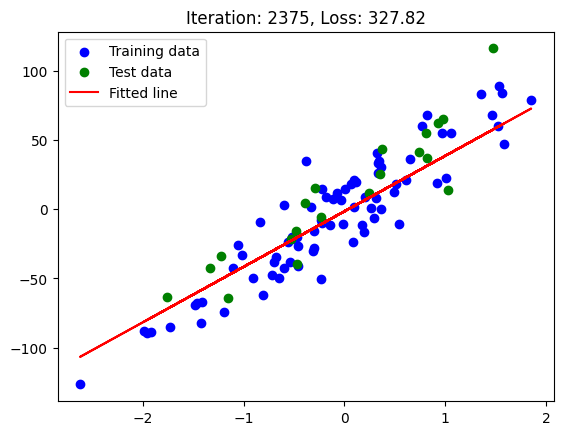

In [4]:
model = LinearRegression(n_features=1)
epochs = 2500
losses = []
for i in range(epochs):
    model.train(X_train, Y_train)
    
    y_hat = model.forward(X_train)
    loss = np.mean((Y_train - y_hat) ** 2)
    losses.append(loss)
    
    if i % (epochs // 20) == 0:
        plt.scatter(X_train, Y_train, color='blue', label='Training data')
        plt.scatter(X_test, Y_test, color='green', label='Test data')
        plt.plot(X_train, model.forward(X_train), color='red', label='Fitted line')
        plt.title(f"Iteration: {i}, Loss: {loss:.2f}")
        plt.legend()
        plt.show()

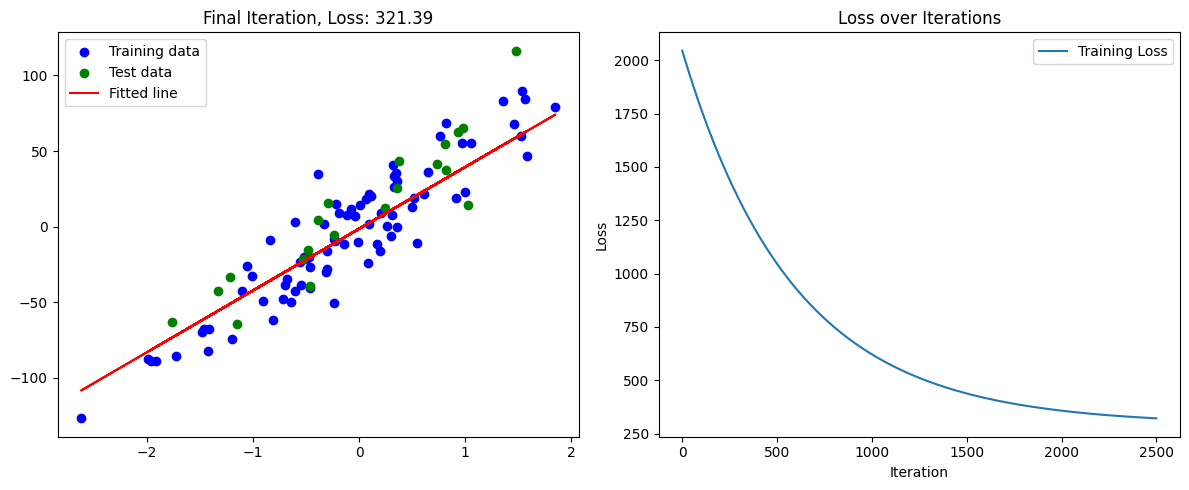

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_train, Y_train, color='blue', label='Training data')
axs[0].scatter(X_test, Y_test, color='green', label='Test data')
axs[0].plot(X_train, model.forward(X_train), color='red', label='Fitted line')
axs[0].set_title(f"Final Iteration, Loss: {loss:.2f}")
axs[0].legend()

axs[1].plot(losses, label='Training Loss')
axs[1].set_title("Loss over Iterations")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()